In [1]:
import pandas as pd                    # Import the pandas library for data manipulation and analysis
import seaborn as sns                  # Import the seaborn library for data visualization
import matplotlib.pyplot as plt        # Import the matplotlib library for creating plots
from sklearn.cluster import KMeans     # Import the KMeans algorithm from scikit-learn for clustering
import warnings                        # Import the warnings module to suppress any warnings
warnings.filterwarnings('ignore')      # Ignore any warning messages that may appear during execution

In [2]:
df = pd.read_csv("C:/Users/SANJEEV\Downloads/Python+ML_Project_Shopping_Customer_segmentation/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


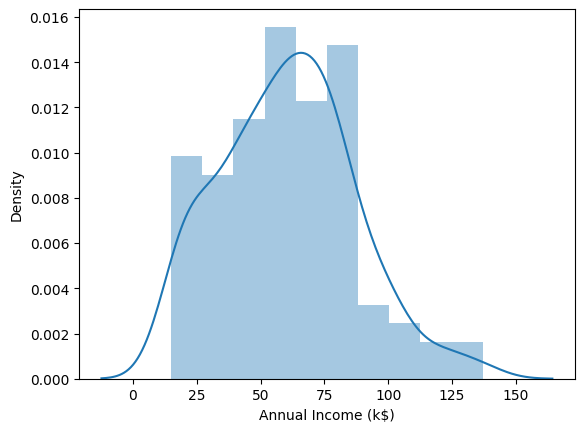

In [5]:
sns.distplot(df['Annual Income (k$)']);

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

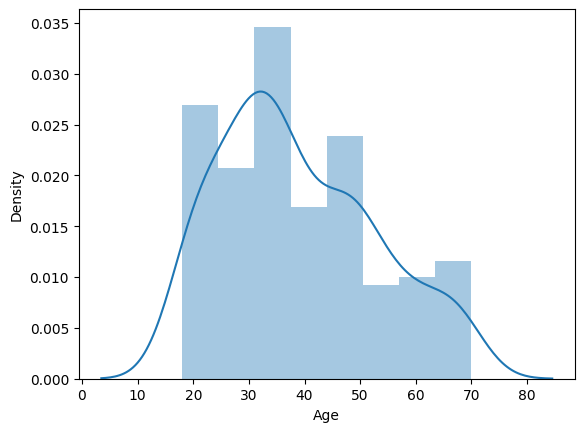

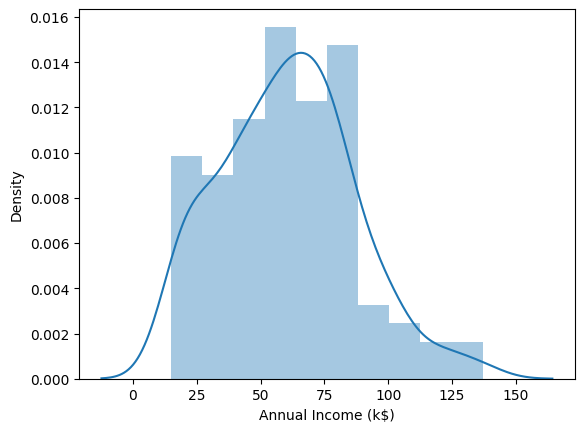

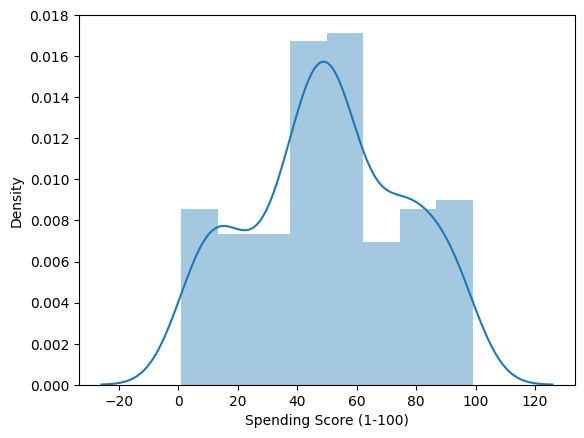

In [7]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']  # Define a list of column names

for i in columns:                             # Iterate over each column name in the list
    plt.figure()                              # Create a new figure for each column
    sns.distplot(df[i])                       # Plot the distribution of the current column using seaborn

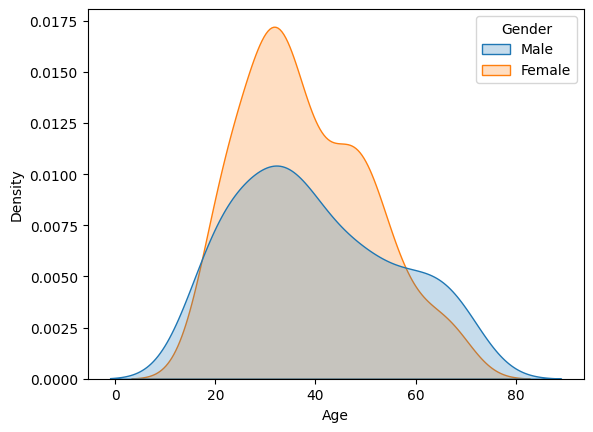

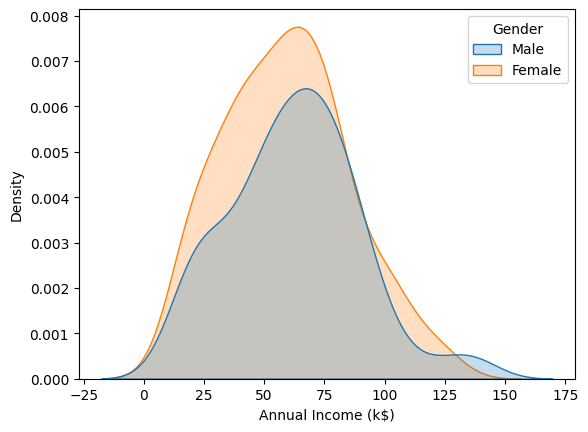

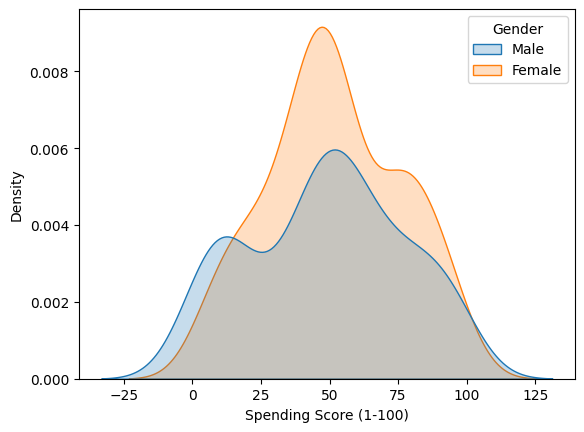

In [8]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']  # Define a list of column names

for i in columns:                             # Iterate over each column name in the list
    plt.figure()                              # Create a new figure for each column
    sns.kdeplot(data=df, x=i, shade=True, hue=df['Gender']) # Create a KDE plot for the current column, 
                                                            # with shade and hue based on the 'Gender' column in the DataFrame

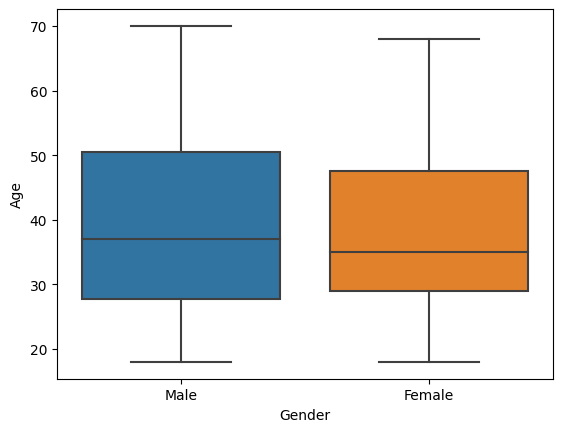

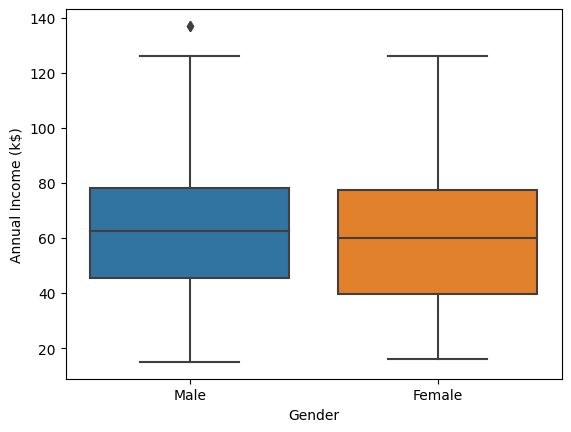

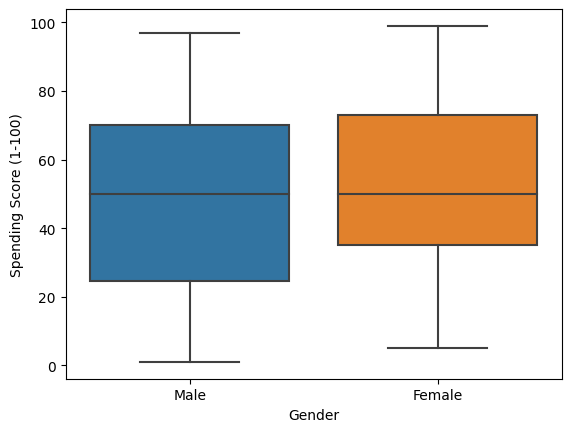

In [9]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']  # Define a list of column names

for i in columns:                             # Iterate over each column name in the list
    plt.figure()                              # Create a new figure for each column
    sns.boxplot(data=df, x='Gender', y=i)      # Create a boxplot for the current column, with x-axis as 'Gender' and y-axis as the current column

In [10]:
# Count the frequency of each gender category and calculate the proportion of each category in the 'Gender' column
df['Gender'].value_counts(normalize=True) 

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

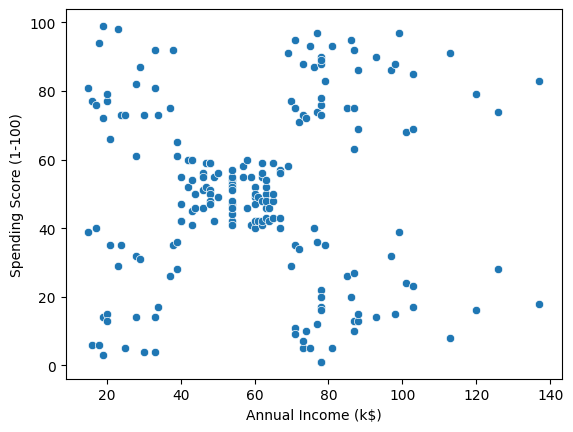

In [11]:
# Create a scatter plot to visualize the relationship between 'Annual Income (k$)' and 'Spending Score (1-100)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

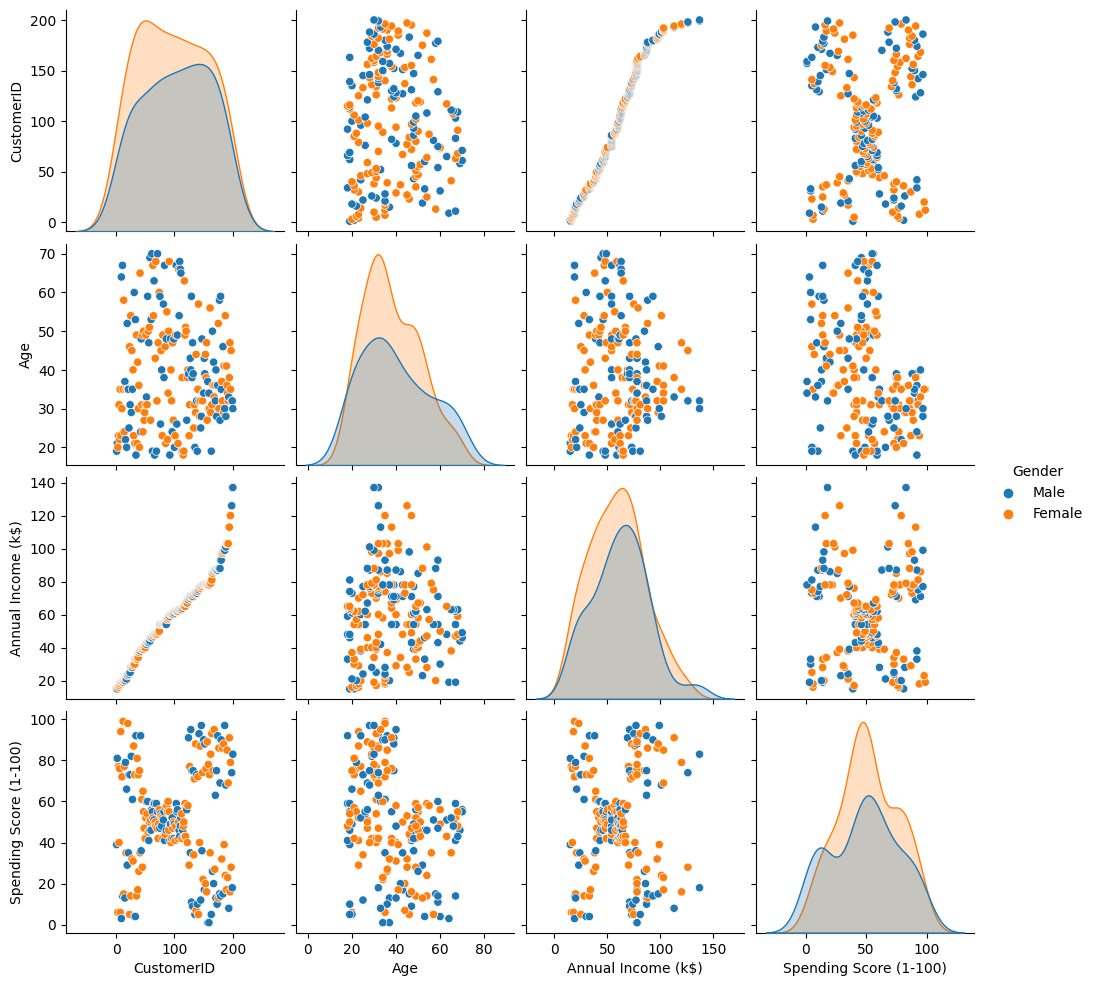

In [12]:
# df = df.drop('CustomerID', axis = 1)
sns.pairplot(df, hue = 'Gender')

In [13]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [14]:
df.corr()  # Compute the correlation matrix for the DataFrame df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

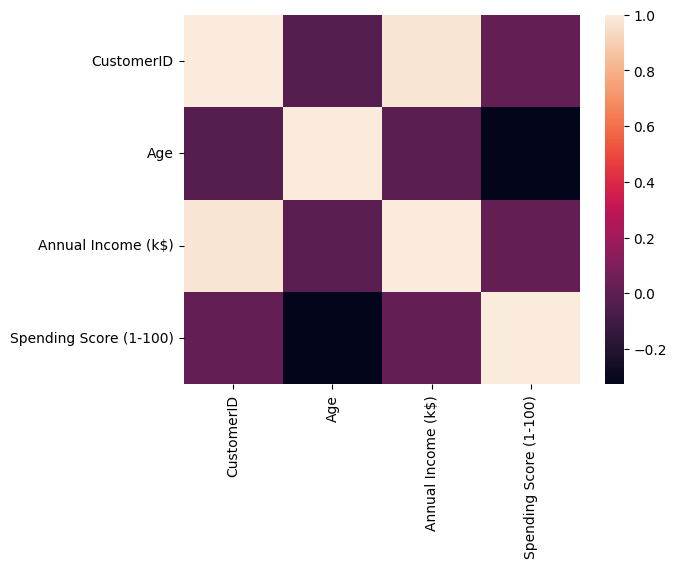

In [15]:
sns.heatmap(df.corr())

<Axes: >

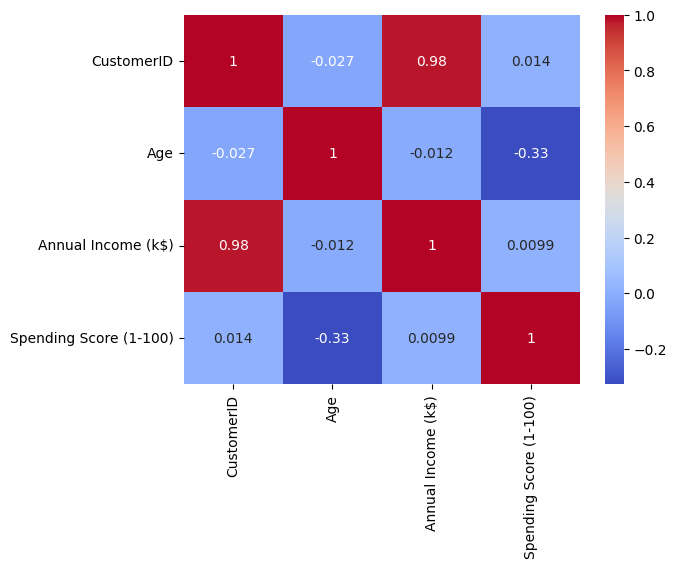

In [16]:
# Create a heatmap to visualize the correlation matrix of the DataFrame df
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Clustering
### (Univariate, Bivariate, Multivariate)

# Univariate Clustering

In [17]:
clustering1 = KMeans(3)  # Create a KMeans clustering model with 3 clusters


In [18]:
clustering1.fit(df[['Annual Income (k$)']])  # Fit the KMeans model to the 'Annual Income (k$)' column of the DataFrame df

KMeans(n_clusters=3)

In [19]:
clustering1.labels_  # Access the labels assigned by the KMeans model to each data point in the fitted dataset

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [20]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [21]:
# Count the frequency of each value in the 'Income Cluster' column of the DataFrame df
df['Income Cluster'].value_counts()  

2    90
1    74
0    36
Name: Income Cluster, dtype: int64

In [22]:
# Retrieve the inertia value of the KMeans model clustering1
clustering1.inertia_  

23517.330930930926

In [23]:
inertia_score = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)  # Create a KMeans model with a varying number of clusters
    kmeans.fit(df[['Annual Income (k$)']])  # Fit the KMeans model to the 'Annual Income (k$)' column of the DataFrame df
    inertia_score.append(kmeans.inertia_)  # Append the inertia value of the KMeans model to the inertia_score list

# The inertia_score list will contain the inertia values for each number of clusters tested


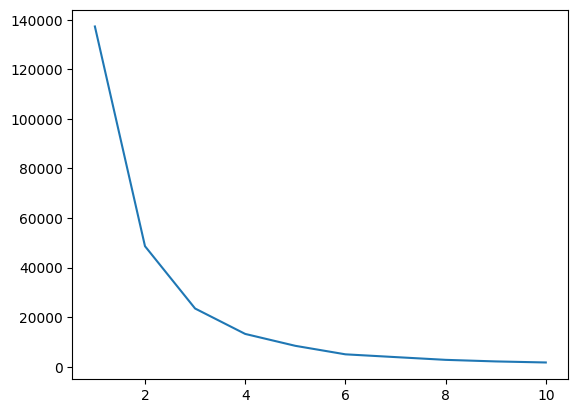

In [24]:
plt.plot(range(1,11), inertia_score)
plt.show()

In [25]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [26]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


# Bivariate Clustering

In [27]:
# Create a KMeans model with 5 clusters
clustering2 = KMeans(n_clusters=5)  
# Fit the KMeans model to the 'Annual Income (k$)' and 'Spending Score (1-100)' columns of the DataFrame df
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']]) 
# Access the labels assigned by the KMeans model to each data point in the fitted dataset
clustering2.labels_ 

# Add a new column 'Spending_and_Income_cluster' to the DataFrame df, containing the labels assigned by the KMeans model
df['Spending_and_Income_cluster'] = clustering2.labels_     

# Display the first few rows of the updated DataFrame
df.head()                                                   


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending_and_Income_cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,3


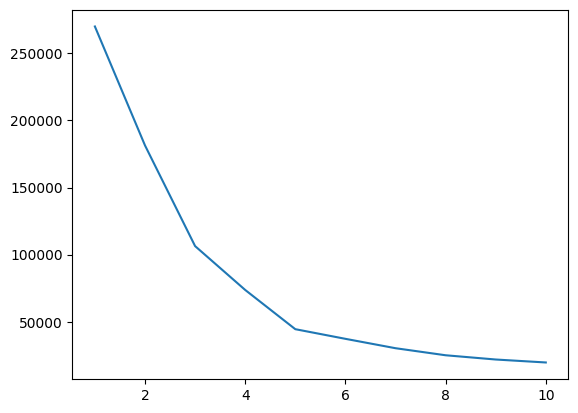

In [28]:
inertia_score2 = []

for i in range(1, 11):
     # Create a KMeans model with a varying number of clusters
    kmeans2 = KMeans(n_clusters=i)   
    # Fit the KMeans model to the 'Annual Income (k$)' and 'Spending Score (1-100)' columns of the DataFrame df
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])    
    # Append the inertia value of the KMeans model to the inertia_score2 list
    inertia_score2.append(kmeans2.inertia_)                             
# Create a line plot to visualize the inertia values for each number of clusters
plt.plot(range(1, 11), inertia_score2)                                   
plt.show()

In [29]:
# Create a DataFrame 'centers' to store the coordinates of the cluster centers obtained from the KMeans model clustering2
centers = pd.DataFrame(clustering2.cluster_centers_) 

# Assign column names 'x' and 'y' to the DataFrame centers to represent the respective coordinates of the cluster centers
centers.columns = ['x', 'y']

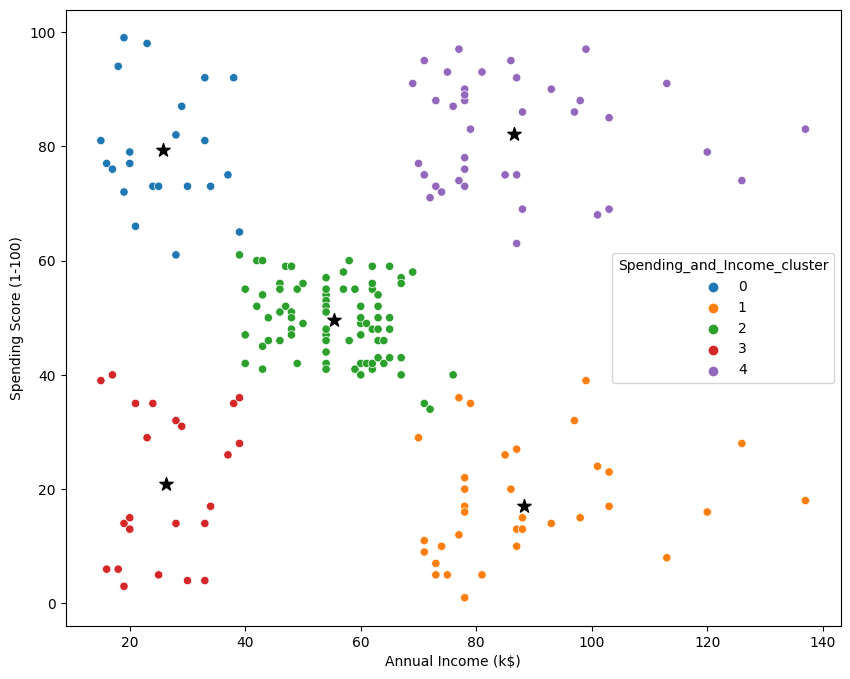

In [32]:
# Create a figure with a specific size of 10x8 inches
plt.figure(figsize=(10, 8)) 
# Plot the cluster centers as black stars
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
# Create a scatter plot to visualize the data points, with hue based on the 'Spending_and_Income_cluster' column
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Spending_and_Income_cluster', palette='tab10')  
plt.show()

# Save the figure as 'clustering_bivariate.png'
# plt.savefig('clustering_bivariate.png')  


In [40]:
pd.crosstab(df['Spending_and_Income_cluster'], df['Gender'], normalize = True)

Gender,Female,Male
Spending_and_Income_cluster,,
0,0.065,0.045
1,0.080,0.095
2,0.240,0.165
3,0.070,0.045
4,0.105,0.090


In [41]:
df.groupby('Spending_and_Income_cluster')['Age'].mean()

Spending_and_Income_cluster
0    25.272727
1    41.114286
2    42.716049
3    45.217391
4    32.692308
Name: Age, dtype: float64

# Multivariate Clustering

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
dff = pd.get_dummies(df, drop_first = True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending_and_Income_cluster,Gender_Male
0,1,19,15,39,1,3,1
1,2,21,15,81,1,0,1
2,3,20,16,6,1,3,0
3,4,23,16,77,1,0,0
4,5,31,17,40,1,3,0


In [44]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [50]:
dff = pd.DataFrame(scaler.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


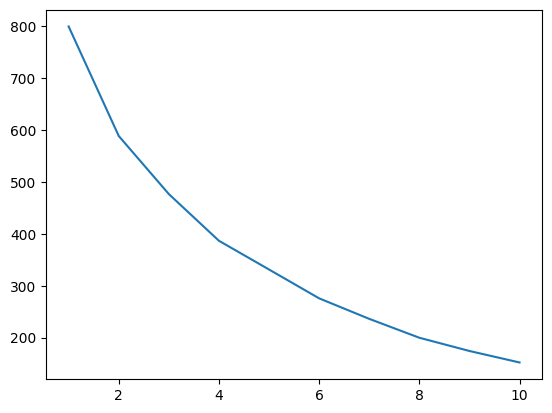

In [51]:
inertia_score3 = []

for i in range(1, 11):
    kmeans3 = KMeans(n_clusters=i) # Create a KMeans model with a varying number of clusters
    kmeans3.fit(dff)               # Fit the KMeans model to the data dff
    inertia_score3.append(kmeans3.inertia_) # Append the inertia value of the KMeans model to the inertia_score3 list

plt.plot(range(1, 11), inertia_score3)  # Create a line plot to visualize the inertia values for each number of clusters
plt.show()


In [52]:
# Saving the DataFrame to CSV file for future visualization

df.to_csv('Clustering.csv')